In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
from tensorflow.keras.utils import plot_model
import visualkeras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  
from keras_visualizer import visualizer 
import pydotplus
from keras.utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
from ann_visualizer.visualize import ann_viz

In [3]:
df = pd.read_csv('train_data_evaluation_part_2.csv')
test = pd.read_csv('test_data_evaluation_part2.csv')

In [4]:
df[:2]

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test[:2]

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.drop(columns='Unnamed: 0',inplace=True)
test.drop(columns='Unnamed: 0',inplace=True)

In [7]:
print(df.shape)
print(test.shape)

(82580, 29)
(1000, 29)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

In [9]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,4.667958,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,4.562507,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [11]:
df['Age'].mean()

45.46855417713169

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Age']=df['Age'].astype(int)

In [13]:
df[:2]

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,45,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test['BookingsCheckedIn'].value_counts()

0    521
1    473
2      6
Name: BookingsCheckedIn, dtype: int64

In [15]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [16]:
test.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [17]:
df['BookingsCheckedIn'].value_counts()

1     61737
0     19394
2      1141
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
25        1
17        1
66        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: BookingsCheckedIn, dtype: int64

In [18]:
# def countOccurrence(a):
#     k = {}
#     for j in a:
#         if j in k:
#             k[j] +=1
#         else:
#             k[j] =1
#     return k
# dic=countOccurrence(df['BookingsCheckedIn'].values)
# lst1=[]
# print(dic)
# for k in dic:
#     if k>1 and k!=1 and  k!=0 :
#         lst1.append(k)        
# df.BookingsCheckedIn[df.BookingsCheckedIn.isin(lst1)] = 2
# df['BookingsCheckedIn'].value_counts()

In [19]:
test['BookingsCheckedIn'].value_counts()

0    521
1    473
2      6
Name: BookingsCheckedIn, dtype: int64

In [20]:
df['Nationality'].value_counts()

FRA    12307
PRT    11382
DEU    10164
GBR     8610
ESP     4864
       ...  
GNQ        1
GIN        1
SWZ        1
SOM        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In [21]:
df['DistributionChannel'].value_counts()

Travel Agent/Operator      67798
Direct                     11709
Corporate                   2565
Electronic Distribution      508
Name: DistributionChannel, dtype: int64

In [22]:
df['Age'].value_counts()

45     5439
50     2015
51     2013
54     1965
53     1913
       ... 
110       1
91        1
122       1
96        1
109       1
Name: Age, Length: 105, dtype: int64

In [23]:
columns=['Nationality','MarketSegment','DistributionChannel']
for feature in columns:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    test[feature] = le.fit_transform(test[feature])

In [24]:
test_X=test.drop(columns=['BookingsCheckedIn','ID'])
test_y=test[['BookingsCheckedIn']]

In [25]:
X=df.drop(columns=['BookingsCheckedIn','ID'])
y=df[['BookingsCheckedIn']]

In [26]:
print(X.shape,y.shape)

(82580, 27) (82580, 1)


In [27]:
test_X.shape

(1000, 27)

In [28]:
len(df['BookingsCheckedIn'].value_counts())

29

In [29]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(57806, 27) (57806, 1) (24774, 27) (24774, 1)


In [31]:
# importing the libraries
from keras.models import Sequential
from keras import models  
from keras import layers 
 
# create ANN model
model = Sequential()
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=32, input_dim=27, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=16, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 


In [32]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                896       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [33]:
# # Fitting the ANN to the Training set
# model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

In [34]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=1)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 


In [ ]:
######################################################
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

Epoch 1/5
11562/11562 [==============================] - 111s 9ms/step - loss: 0.5509
Epoch 2/5
11562/11562 [==============================] - 40s 3ms/step - loss: 0.1504
Epoch 5/5
775/775 [==============================] - 2s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 95.40073239570994
Epoch 1/10
11562/11562 [==============================] - 39s 3ms/step - loss: 0.1278
Epoch 6/10
11562/11562 [==============================] - 41s 4ms/step - loss: 0.1391
Epoch 7/10
11562/11562 [==============================] - 41s 4ms/step - loss: 0.1298
Epoch 8/10
11562/11562 [==============================] - 38s 3ms/step - loss: 0.1183
Epoch 9/10
775/775 [==============================] - 2s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 92.58959490430786
Epoch 1/50
11562/11562 [==============================] - 40s 3ms/step - loss: 0.6685
Epoch 2/50
11562/11562 [==============================] - 38s 3ms/step - loss: 0.6522
Epoch 3/50
11562/11562 [=====================

In [ ]:

%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [33]:
test_X_=test_X
test_y_=test_y

###Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(test_X)
TargetVarScalerFit=TargetVarScaler.fit(test_y)
 
### Generating the standardized values of X and y
test_X=PredictorScalerFit.transform(test_X)
test_y=TargetVarScalerFit.transform(test_y)

In [34]:
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
epochs=10
batch_size=5
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=15, 
                                restore_best_weights=True)

history = model.fit(X,y,callbacks=[es],epochs=epochs,batch_size=batch_size,shuffle=True,validation_split=0.2,verbose=1)

Epoch 1/10
13213/13213 [==============================] - 66s 5ms/step - loss: 0.5218 - val_loss: 0.2162
Epoch 2/10
13213/13213 [==============================] - 68s 5ms/step - loss: 0.4043 - val_loss: 0.1970
Epoch 3/10
13213/13213 [==============================] - 70s 5ms/step - loss: 0.3523 - val_loss: 0.1448
Epoch 4/10
13213/13213 [==============================] - 68s 5ms/step - loss: 0.3218 - val_loss: 0.1454
Epoch 5/10
13213/13213 [==============================] - 64s 5ms/step - loss: 0.3336 - val_loss: 0.1432
Epoch 6/10
13213/13213 [==============================] - 66s 5ms/step - loss: 0.2917 - val_loss: 0.1214
Epoch 7/10
13213/13213 [==============================] - 65s 5ms/step - loss: 0.3049 - val_loss: 0.1647
Epoch 8/10
13213/13213 [==============================] - 67s 5ms/step - loss: 0.2806 - val_loss: 0.1296
Epoch 9/10
13213/13213 [==============================] - 62s 5ms/step - loss: 0.2802 - val_loss: 0.1352
Epoch 10/10
13213/13213 [==============================

In [35]:
# history=model.fit(X, y,batch_size = 5, epochs = 10, verbose=0)

In [36]:
# history.history

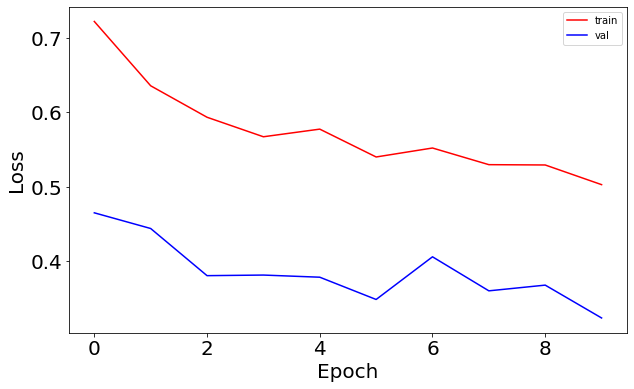

In [37]:
history_dict=history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)






In [39]:
ann_viz(model,view=True,filename="network.gv",  title="Neural network" )

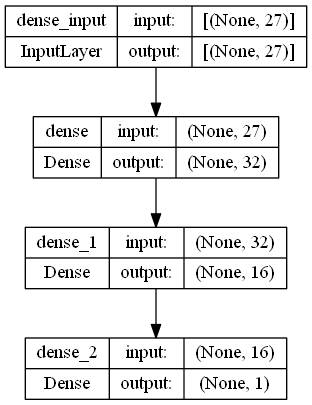

In [38]:
plot_model(model,to_file='model_plot.png',show_shapes=True, show_layer_names=True)

In [39]:
visualkeras.layered_view(model)

In [40]:
MAPE = np.mean(100 * (np.abs(y-model.predict(X))/y))
accuracy=100-MAPE
print("Accuracy :",accuracy)

2581/2581 [==============================] - 11s 4ms/step
Accuracy : 83.45413404305867


In [41]:
PredictorScalerFit=PredictorScaler.fit(test_X)
TargetVarScalerFit=TargetVarScaler.fit(test_y)
 
# Generating Predictions on testing data
Predictions=model.predict(test_X)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(test_y)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(test_X)
Predictors=['Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom']
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['BookingsCheckedIn_y']=y_test_orig
TestingData['BookingsCheckedIn']=abs(np.round_(Predictions))
TestingData.head()

32/32 [==============================] - 0s 3ms/step


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,BookingsCheckedIn_y,BookingsCheckedIn
0,1.672072,0.380090,2.209315,-0.555302,-0.541048,-0.441840,0.0,0.0,-0.658221,-0.699310,...,0.0,-0.222076,-0.886405,-0.377964,-0.054855,0.0,0.0,-0.360477,-0.947933,1.0
1,1.672072,-1.238600,2.209315,1.404232,1.058645,1.166354,0.0,0.0,2.532895,1.689045,...,0.0,-0.222076,-0.886405,-0.377964,-0.054855,0.0,0.0,-0.360477,1.006568,0.0
2,1.672072,-1.290815,2.209315,-0.555302,-0.541048,-0.441840,0.0,0.0,-0.658221,-0.699310,...,0.0,-0.222076,-0.886405,-0.377964,-0.054855,0.0,0.0,-0.360477,-0.947933,1.0
3,1.672072,-1.447463,2.209315,-0.555302,-0.541048,-0.441840,0.0,0.0,-0.658221,-0.699310,...,0.0,-0.222076,-0.886405,-0.377964,-0.054855,0.0,0.0,-0.360477,-0.947933,1.0
4,1.266072,NaN,2.209315,-0.555302,-0.541048,-0.441840,0.0,0.0,-0.658221,-0.699310,...,0.0,-0.222076,1.128152,-0.377964,-0.054855,0.0,0.0,-0.360477,-0.947933,NaN


In [42]:
TestingData.fillna(0,inplace=True)
APE=100*(abs(TestingData['BookingsCheckedIn_y']-TestingData['BookingsCheckedIn'])/TestingData['BookingsCheckedIn_y'])
APE.replace([np.inf, -np.inf], 0, inplace=True)
TestingData['APE']=abs(APE)
 
print('The Accuracy of ANN model is:', 100-abs(np.mean(APE)))


The Accuracy of ANN model is: 74.7179313673448


In [43]:
test['BookingsCheckedIn_predicted']=abs(np.round_(Predictions))

In [44]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://b950fe18-e459-40f2-b7c2-f2743b49184e/assets


In [45]:
# predictions=model.predict(test_X_)

In [46]:
# predictions

In [47]:
# test['BookingsCheckedIn_predicted']=np.round_(predictions)

In [48]:
test.fillna(0,inplace=True)

In [49]:
test.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,BookingsCheckedIn_predicted
0,82591,41,47.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,82592,41,16.0,11,130,483.48,155.1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
2,82593,41,15.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,82594,41,12.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,82595,36,0.0,11,0,0.00,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0


In [50]:
test['BookingsCheckedIn_predicted'].value_counts()

0.0    798
1.0    202
Name: BookingsCheckedIn_predicted, dtype: int64

In [51]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(test_y_, abs(np.round_(np.nan_to_num(Predictions))))
print(conf_mat)

[[324 197   0]
 [471   2   0]
 [  3   3   0]]


Text(132.0, 0.5, 'True_number')

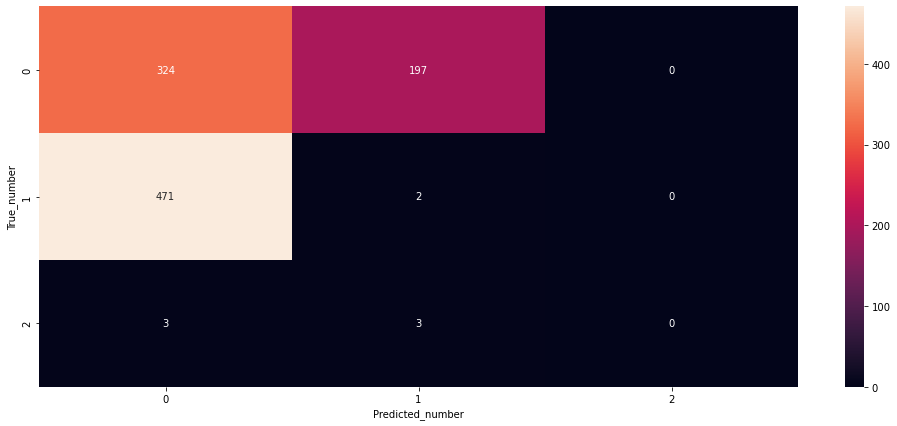

In [52]:

plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

In [53]:
test.to_csv('Final_test_csv_with_prediction.csv',index=False)